# TVS Loan Default Data Analysis

## Install Required Libraries

Before starting, install all necessary Python libraries for data analysis and machine learning. This ensures that the environment has the latest versions of the required packages.

In [34]:
%pip install pandas numpy seaborn matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Libraries

Let's import all the necessary libraries for data manipulation, visualization, and feature selection. This step ensures that all required modules are available for the subsequent analysis.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif, f_classif
from scipy.stats import spearmanr

# Show full columns
pd.set_option('display.max_columns', None)


Now that we've imported the required libraries, we're ready to load and explore the dataset in the next step.

## Load and Inspect the Dataset

In this step, we'll load the dataset from a CSV file, assign meaningful column names, and perform an initial inspection. This helps us understand the structure of the data and identify any missing values or data type issues.

In [36]:
# Load CSV directly from same folder
df = pd.read_csv('./TVS.csv')

# Define new column names
new_columns = [
    "Customer_ID",
    "First_EMI_Bounced",
    "Bounces_Last_12_Months",
    "Max_MOB",
    "Total_Bounces_On_Loan",
    "EMI",
    "Loan_Amount",
    "Tenure",
    "Dealer_Code",
    "Product_Code",
    "Advance_EMIs_Paid",
    "Interest_Rate",
    "Gender",
    "Employment_Type",
    "Resident_Type",
    "DOB",
    "Loan_Age_At_Application",
    "Total_Loans",
    "Secured_Loans",
    "Unsecured_Loans",
    "Max_Sanctioned_Amount_Live",
    "New_Loans_Last_3_Months",
    "Total_Secured_Sanctioned_Live",
    "Total_Unsecured_Sanctioned_Live",
    "Max_TwoWheeler_Loan_Amount",
    "Months_Since_Last_Personal_Loan",
    "Months_Since_First_Consumer_Durable_Loan",
    "DPD_30_Last_6_Months",
    "DPD_60_Last_6_Months",
    "DPD_90_Last_3_Months",
    "Tier",
    "Loan_Default"
]

# Rename columns
df.columns = new_columns
# Basic shape and types
print("Shape of Dataset:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

# Replace 'target' with your actual target column
print("\nTarget Distribution:\n", df['Loan_Default'].value_counts(normalize=True))

Shape of Dataset: (119528, 32)

Missing Values:
 Customer_ID                                      0
First_EMI_Bounced                                0
Bounces_Last_12_Months                           0
Max_MOB                                      34480
Total_Bounces_On_Loan                        34480
EMI                                          34480
Loan_Amount                                  34480
Tenure                                       34480
Dealer_Code                                  34480
Product_Code                                 34480
Advance_EMIs_Paid                            34480
Interest_Rate                                34480
Gender                                       34480
Employment_Type                              34480
Resident_Type                                35397
DOB                                          34480
Loan_Age_At_Application                      34480
Total_Loans                                      0
Secured_Loans                    

C:\Users\psp17\AppData\Local\Temp\ipykernel_26176\2333716700.py:2: DtypeWarning: Columns (9,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./TVS.csv')


### Dataset Overview

- **Shape of Dataset:**  
  The dataset contains 119,528 rows and 32 columns.

- **Missing Values:**  
  Several columns have a significant number of missing values (e.g., `Max_MOB`, `Total_Bounces_On_Loan`, `EMI`, etc. with 34,480 missing entries). Some columns like `Max_Sanctioned_Amount_Live` have even more missing values. We'll need to address these missing values during data cleaning.

- **Data Types Warning:**  
  There is a warning about mixed data types in columns 9, 12, 13, 14, and 15. This usually happens when a column contains both numbers and strings. We'll need to investigate and possibly convert these columns to the appropriate data types.

- **Target Distribution:**  
  The target variable `Loan_Default` is highly imbalanced:
  - 0 (No Default): 97.81%
  - 1 (Default): 2.19%

  This class imbalance should be considered during model development.

## Identify Numerical and Categorical Features

Next, we'll separate the features into numerical and categorical columns. This distinction is crucial for data preprocessing, as different types of features often require different handling (e.g., scaling for numerical features, encoding for categorical features).

In [37]:
# Separate columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Remove target column
target_col = 'Loan_Default'  # 🔁 Replace if needed
if target_col in num_cols: num_cols.remove(target_col)
if target_col in cat_cols: cat_cols.remove(target_col)

print("\nNumerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)



Numerical Columns: ['Customer_ID', 'First_EMI_Bounced', 'Bounces_Last_12_Months', 'Max_MOB', 'Total_Bounces_On_Loan', 'EMI', 'Loan_Amount', 'Tenure', 'Dealer_Code', 'Advance_EMIs_Paid', 'Interest_Rate', 'Loan_Age_At_Application', 'Total_Loans', 'Secured_Loans', 'Unsecured_Loans', 'Max_Sanctioned_Amount_Live', 'New_Loans_Last_3_Months', 'Total_Secured_Sanctioned_Live', 'Total_Unsecured_Sanctioned_Live', 'Max_TwoWheeler_Loan_Amount', 'Months_Since_Last_Personal_Loan', 'Months_Since_First_Consumer_Durable_Loan', 'DPD_30_Last_6_Months', 'DPD_60_Last_6_Months', 'DPD_90_Last_3_Months']
Categorical Columns: ['Product_Code', 'Gender', 'Employment_Type', 'Resident_Type', 'DOB', 'Tier']


### Feature Types Identified

- **Numerical Columns:**  
  - Customer_ID, First_EMI_Bounced, Bounces_Last_12_Months, Max_MOB, Total_Bounces_On_Loan, EMI, Loan_Amount, Tenure, Dealer_Code, Advance_EMIs_Paid, Interest_Rate, Loan_Age_At_Application, Total_Loans, Secured_Loans, Unsecured_Loans, Max_Sanctioned_Amount_Live, New_Loans_Last_3_Months, Total_Secured_Sanctioned_Live, Total_Unsecured_Sanctioned_Live, Max_TwoWheeler_Loan_Amount, Months_Since_Last_Personal_Loan, Months_Since_First_Consumer_Durable_Loan, DPD_30_Last_6_Months, DPD_60_Last_6_Months, DPD_90_Last_3_Months

- **Categorical Columns:**  
  - Product_Code, Gender, Employment_Type, Resident_Type, DOB, Tier

The target column (`Loan_Default`) has been excluded from both lists. This separation will help us apply the correct preprocessing steps to each feature type in the following stages.


## Data Cleaning and Feature Engineering

In this step, we perform several essential data cleaning and feature engineering operations to prepare the dataset for analysis and modeling.

---

### Steps Performed

1. **Drop `Customer_ID` Column**
   - The `Customer_ID` column, which serves only as a unique identifier, is removed from the dataset as it does not provide predictive value.

2. **Convert `Dealer_Code` to Categorical**
   - The `Dealer_Code` column is explicitly converted to a string type to ensure it is treated as a categorical variable in subsequent analysis.

3. **Convert `DOB` to Age**
   - The `DOB` (Date of Birth) column is converted to datetime format.
   - A new `Age` column is created by calculating the difference (in years) between the current date and the date of birth.
   - The original `DOB` column is then dropped, as age is a more useful feature for modeling.

   > **Note:**  
   > A warning was generated during date parsing, indicating that the date format may be ambiguous. If your dates are in `day-month-year` format, consider specifying `dayfirst=True` in `pd.to_datetime()` for more accurate conversion.

4. **Drop Features with More Than 70% Missing Values**
   - Columns with more than 70% missing data are dropped from the dataset to avoid introducing bias or noise.
   - The following columns were removed:
     - `Total_Secured_Sanctioned_Live`
     - `Total_Unsecured_Sanctioned_Live`
     - `Months_Since_Last_Personal_Loan`
     - `Months_Since_First_Consumer_Durable_Loan`

5. **Fill Remaining Missing Values**
   - **Numerical columns:** Missing values are filled with the median of each column.
   - **Categorical columns:** Missing values are filled with the string `'Missing'`.

---



In [38]:
# --- Step 1: Drop Customer_ID if it exists ---
if 'Customer_ID' in df.columns:
    df.drop('Customer_ID', axis=1, inplace=True)
    if 'Customer_ID' in num_cols:
        num_cols.remove('Customer_ID')

# --- Step 2: Convert Dealer_Code to categorical if it exists ---
if 'Dealer_Code' in df.columns:
    df['Dealer_Code'] = df['Dealer_Code'].astype(str)
    if 'Dealer_Code' not in cat_cols:
        cat_cols.append('Dealer_Code')
    if 'Dealer_Code' in num_cols:
        num_cols.remove('Dealer_Code')

# --- Step 3: Convert DOB to Age if it exists ---
if 'DOB' in df.columns:
    df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
    df['Age'] = (pd.to_datetime('today') - df['DOB']).dt.days // 365
    df.drop('DOB', axis=1, inplace=True)
    if 'DOB' in cat_cols:
        cat_cols.remove('DOB')
    if 'Age' not in num_cols:
        num_cols.append('Age')

# --- Step 4: Drop features with >70% missing ---
threshold = 0.7
missing_ratio = df.isnull().sum() / len(df)
to_drop = missing_ratio[missing_ratio > threshold].index.tolist()
df.drop(columns=to_drop, inplace=True)
print("Dropped columns with >70% missing:", to_drop)

# Update column lists
num_cols = [col for col in num_cols if col in df.columns]
cat_cols = [col for col in cat_cols if col in df.columns]

# --- Step 5: Fill missing values safely ---
# Fill numeric
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical only on columns that still exist
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Missing')


C:\Users\psp17\AppData\Local\Temp\ipykernel_26176\3349965331.py:17: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')


Dropped columns with >70% missing: ['Total_Secured_Sanctioned_Live', 'Total_Unsecured_Sanctioned_Live', 'Months_Since_Last_Personal_Loan', 'Months_Since_First_Consumer_Durable_Loan']


### Output Summary

- **Dropped columns with >70% missing:**  
  - `Total_Secured_Sanctioned_Live`
  - `Total_Unsecured_Sanctioned_Live`
  - `Months_Since_Last_Personal_Loan`
  - `Months_Since_First_Consumer_Durable_Loan`

- **Date Parsing Warning:**  
  - A warning was issued regarding the date format in the `DOB` column. Double-check your date format and adjust the parsing parameters if necessary.

---

These cleaning and transformation steps ensure that the dataset is ready for further exploration, feature selection, and modeling.

## Data Cleaning Results and Feature Overview

After completing the data cleaning and feature engineering steps, let's review the current state of the dataset.

---

In [39]:
print("Remaining missing values:", df.isnull().sum().sum())
print("Final shape:", df.shape)
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)


Remaining missing values: 0
Final shape: (119528, 27)
Numerical columns: ['First_EMI_Bounced', 'Bounces_Last_12_Months', 'Max_MOB', 'Total_Bounces_On_Loan', 'EMI', 'Loan_Amount', 'Tenure', 'Advance_EMIs_Paid', 'Interest_Rate', 'Loan_Age_At_Application', 'Total_Loans', 'Secured_Loans', 'Unsecured_Loans', 'Max_Sanctioned_Amount_Live', 'New_Loans_Last_3_Months', 'Max_TwoWheeler_Loan_Amount', 'DPD_30_Last_6_Months', 'DPD_60_Last_6_Months', 'DPD_90_Last_3_Months', 'Age']
Categorical columns: ['Product_Code', 'Gender', 'Employment_Type', 'Resident_Type', 'Tier', 'Dealer_Code']


### Output Summary

- **Remaining Missing Values:**  
  All missing values have been successfully handled. There are now **0 missing values** in the dataset.

- **Final Shape of the Dataset:**  
  - **Rows:** 119,528  
  - **Columns:** 27

---

### Updated Feature Lists

- **Numerical Columns:**  
  - First_EMI_Bounced
  - Bounces_Last_12_Months
  - Max_MOB
  - Total_Bounces_On_Loan
  - EMI
  - Loan_Amount
  - Tenure
  - Advance_EMIs_Paid
  - Interest_Rate
  - Loan_Age_At_Application
  - Total_Loans
  - Secured_Loans
  - Unsecured_Loans
  - Max_Sanctioned_Amount_Live
  - New_Loans_Last_3_Months
  - Max_TwoWheeler_Loan_Amount
  - DPD_30_Last_6_Months
  - DPD_60_Last_6_Months
  - DPD_90_Last_3_Months
  - Age

- **Categorical Columns:**  
  - Product_Code
  - Gender
  - Employment_Type
  - Resident_Type
  - Tier
  - Dealer_Code

---

The dataset is now fully cleaned, with all missing values addressed and features properly categorized. This prepares the data for further analysis, feature selection, and modeling.

## Finalize Categorical Feature List

To ensure there are no duplicate entries in our list of categorical columns, we remove any duplicates and display the final set of categorical features.

---

In [40]:
# Remove duplicates in cat_cols
cat_cols = list(set(cat_cols))
print("✅ Final categorical columns:", cat_cols)

✅ Final categorical columns: ['Resident_Type', 'Dealer_Code', 'Product_Code', 'Tier', 'Employment_Type', 'Gender']


### Output

- **Final categorical columns:**  
  - Resident_Type
  - Dealer_Code
  - Product_Code
  - Tier
  - Employment_Type
  - Gender

---

With this, our list of categorical columns is clean and ready for encoding or further analysis.

## Visual Exploration of Numeric Distributions and Outliers

To better understand the distribution and potential outliers in each numerical feature, we visualize both the histogram and boxplot for every numeric column in the dataset.

---

### What This Step Does

- **Histograms:**  
  Show the overall distribution, skewness, and modality of each numeric variable.
- **Boxplots:**  
  Highlight the presence of outliers, spread, and central tendency.

---

### How to Interpret the Plots

- **Histogram:**  
  - *Symmetric distribution* suggests normality.
  - *Skewed distribution* (left or right) may indicate the need for transformation.
  - *Multiple peaks* can suggest subpopulations or data issues.

- **Boxplot:**  
  - *Dots or points outside the whiskers* are potential outliers.
  - *Long whiskers* indicate high variability or extreme values.

---

### Why This Matters

- **Outlier Detection:**  
  Outliers can distort model training and statistical summaries. Identifying them visually is the first step toward deciding whether to cap, transform, or remove them.

- **Distribution Understanding:**  
  Knowing the shape of each variable helps in choosing the right preprocessing and modeling techniques (e.g., normalization, log transformation).

---

### Next Steps

- Review the plots for each numeric feature.
- Note any variables with significant skewness or outliers.
- Decide on appropriate outlier treatment and transformation strategies in subsequent steps.

---


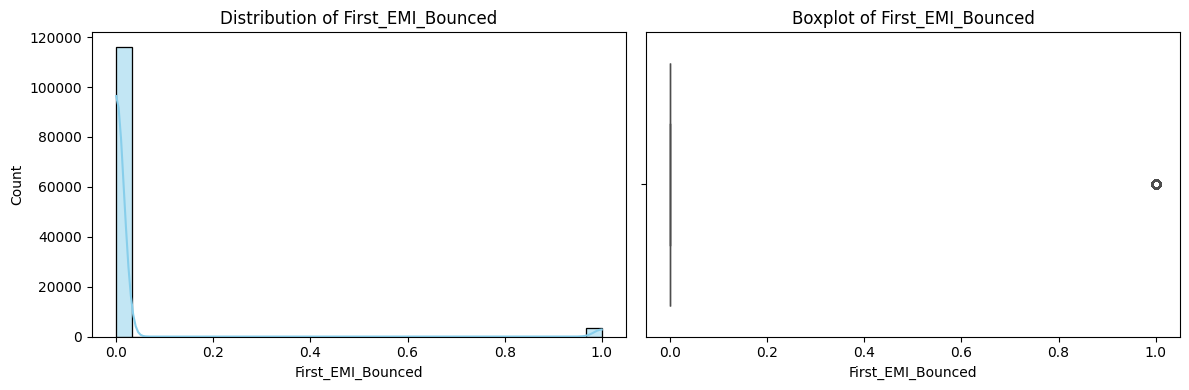

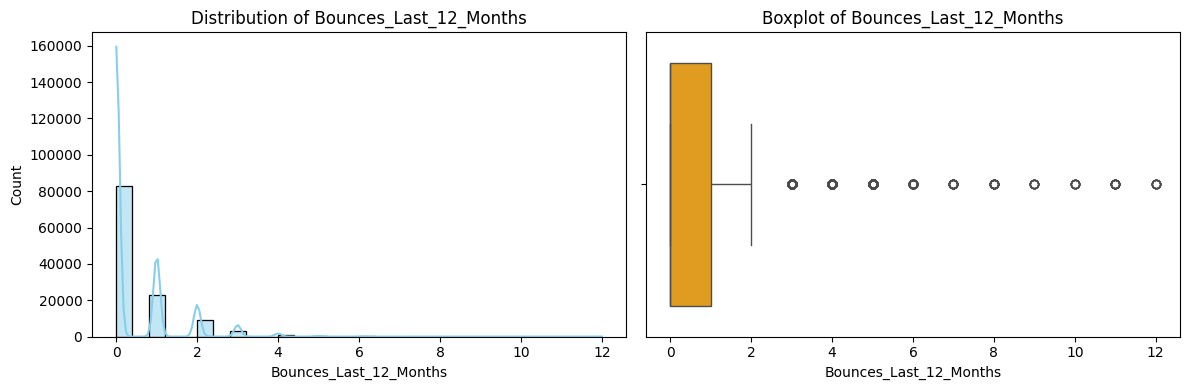

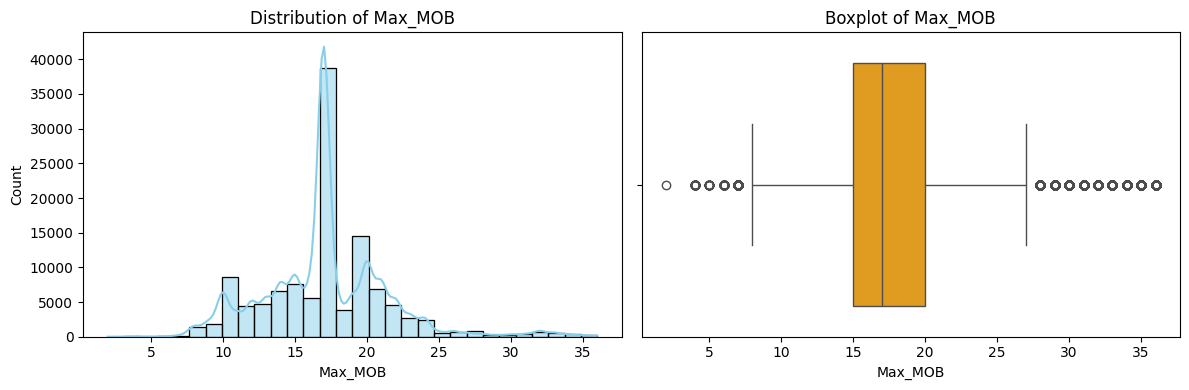

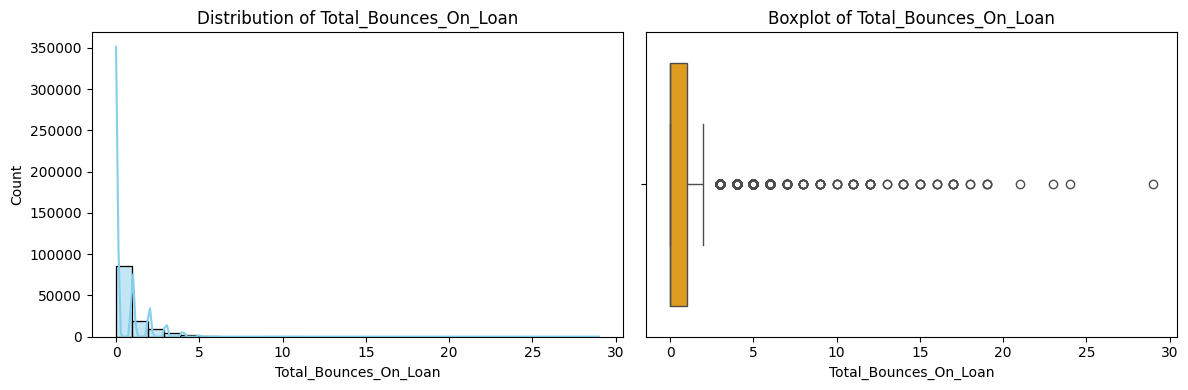

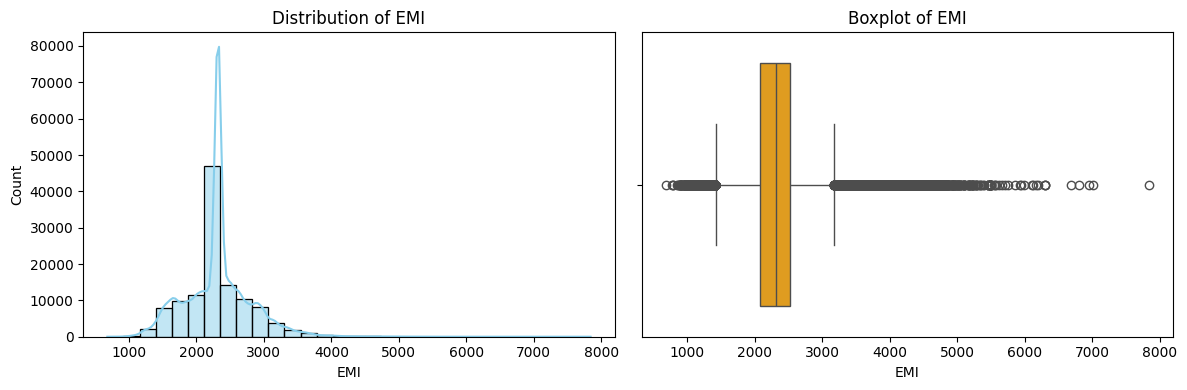

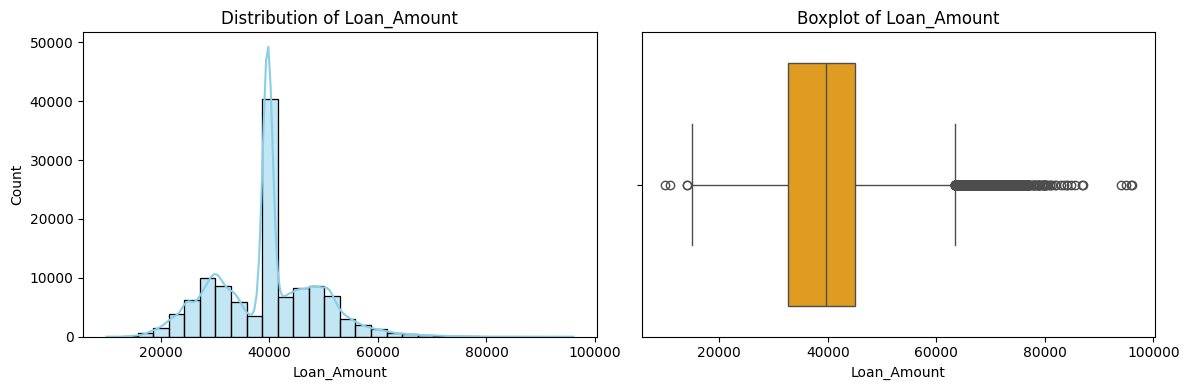

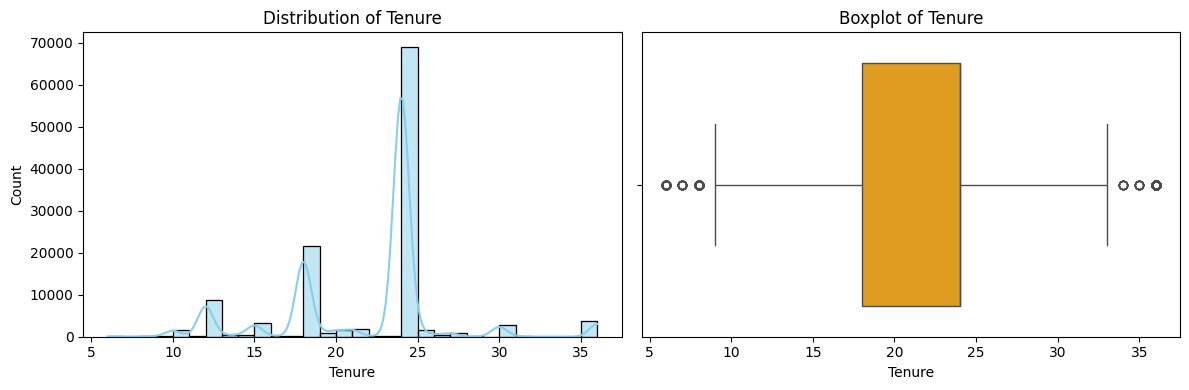

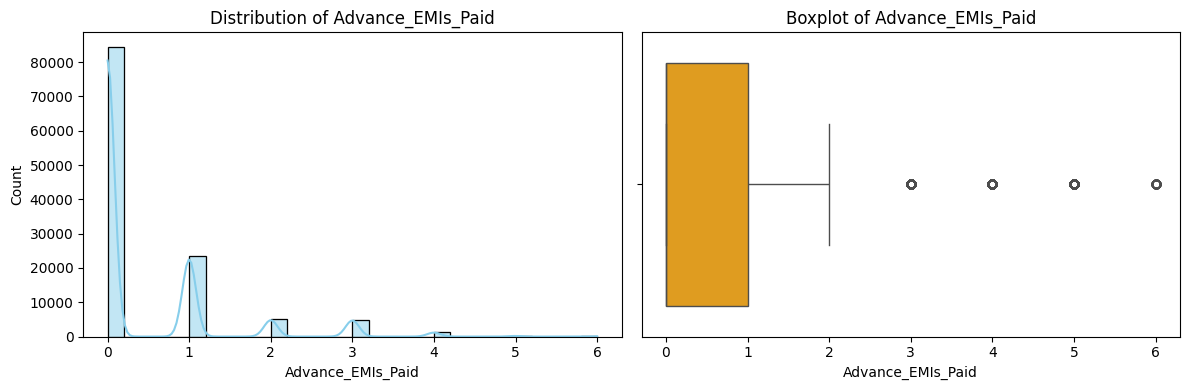

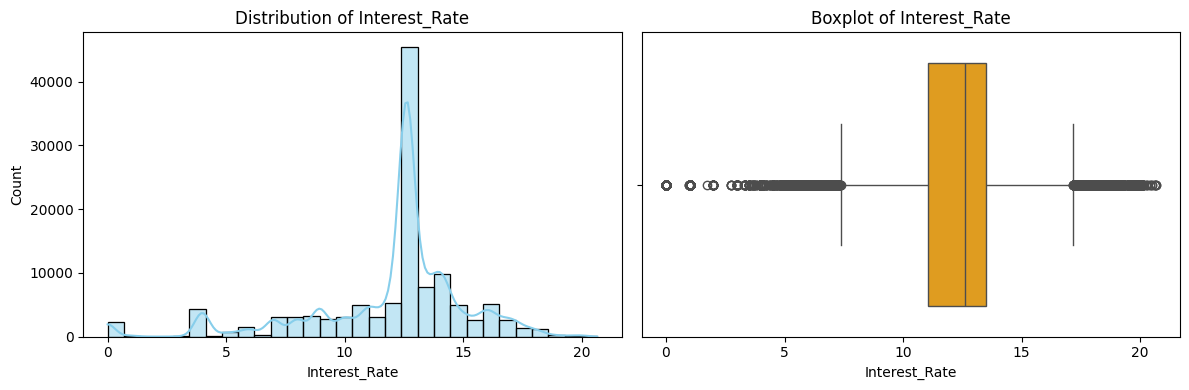

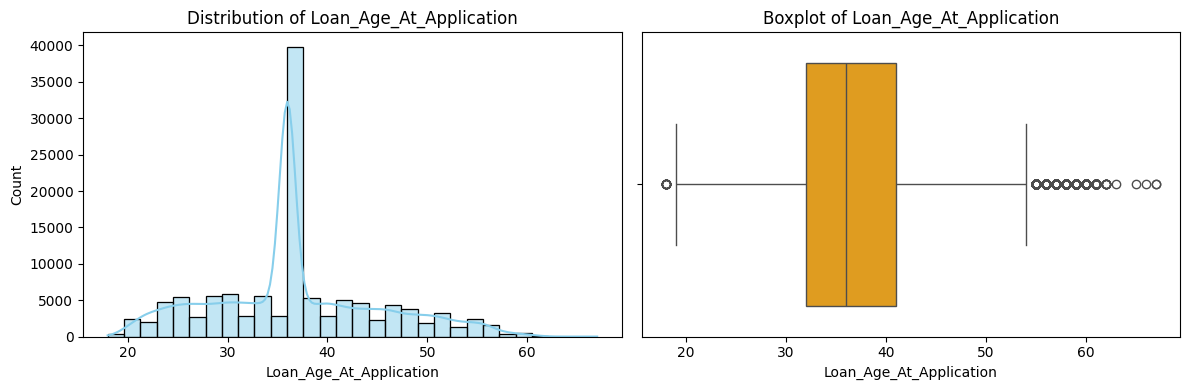

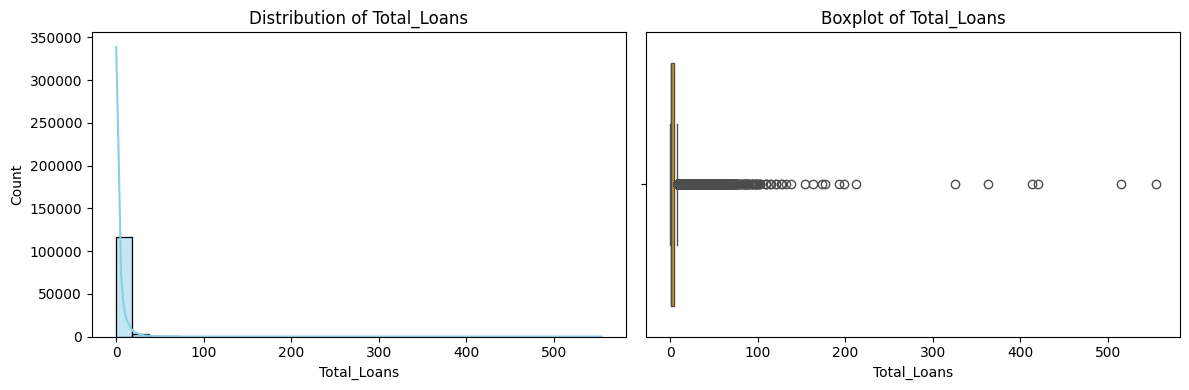

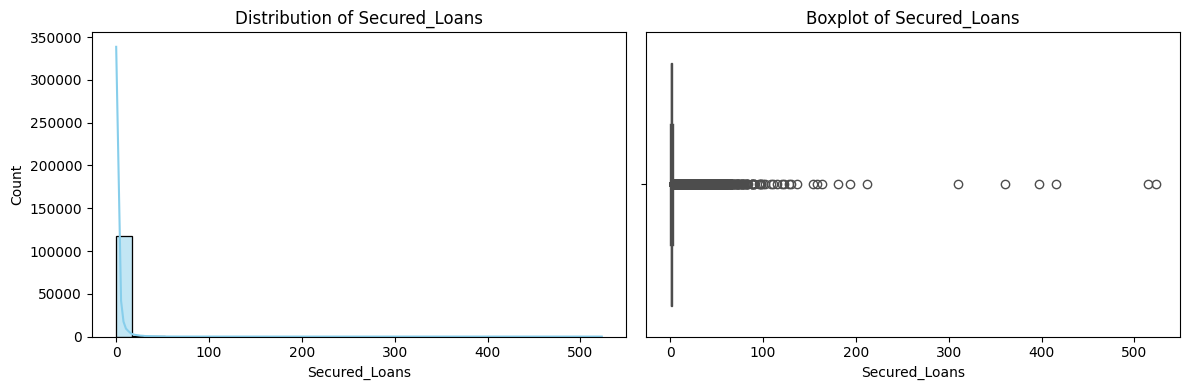

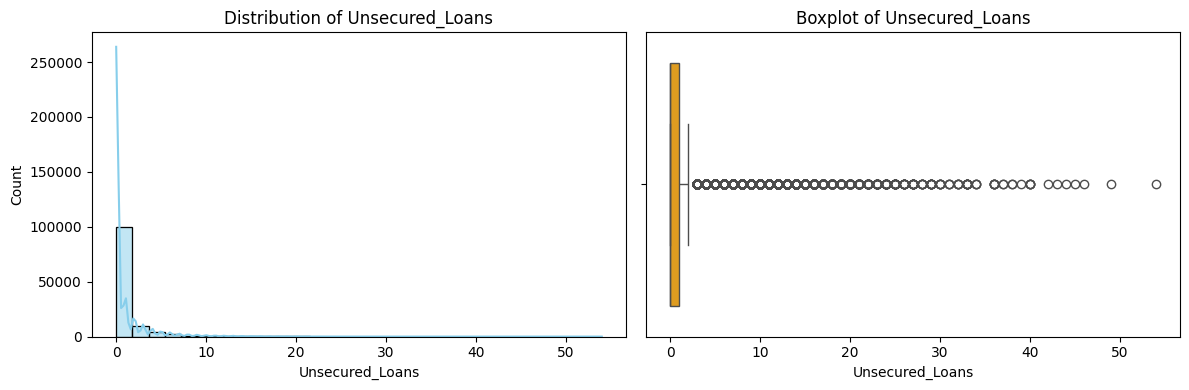

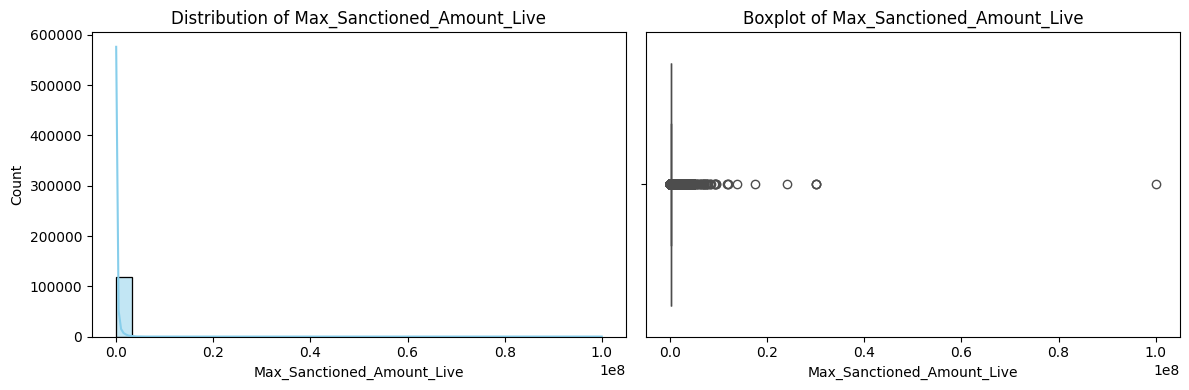

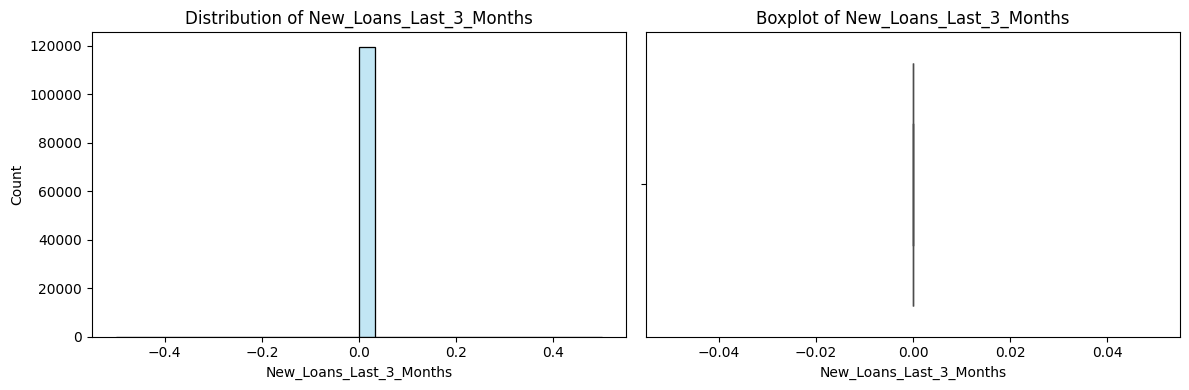

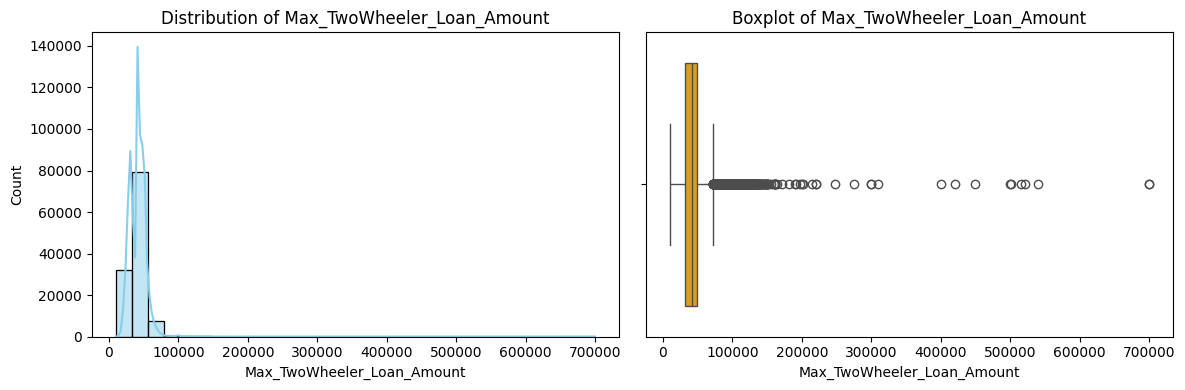

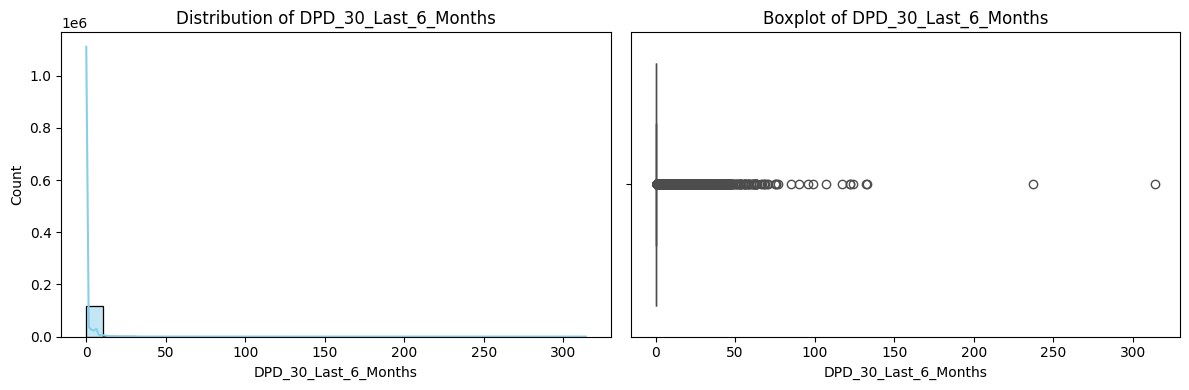

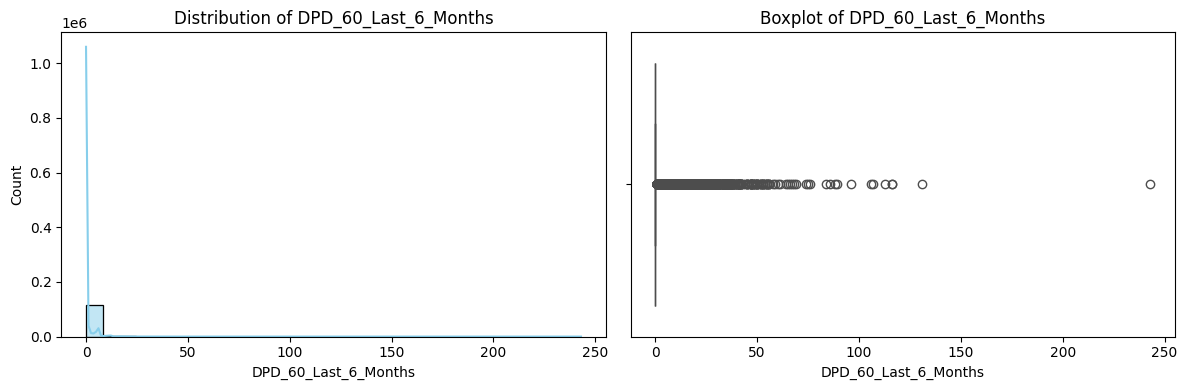

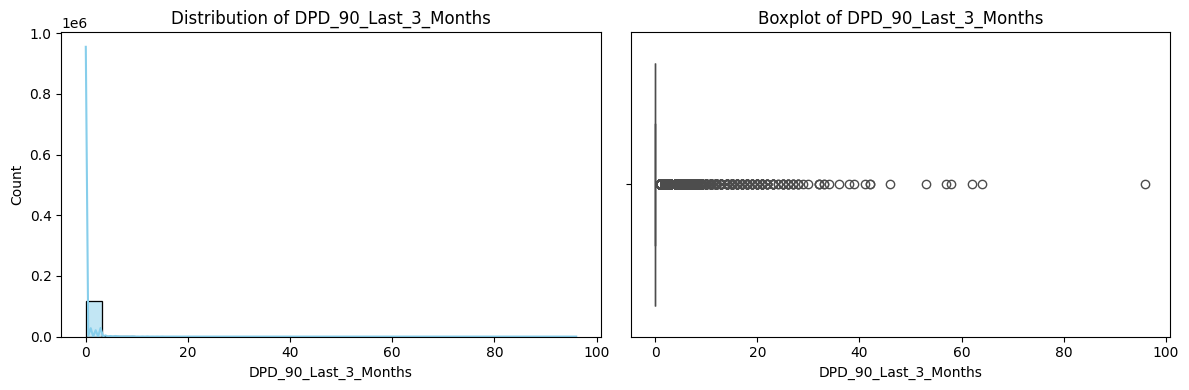

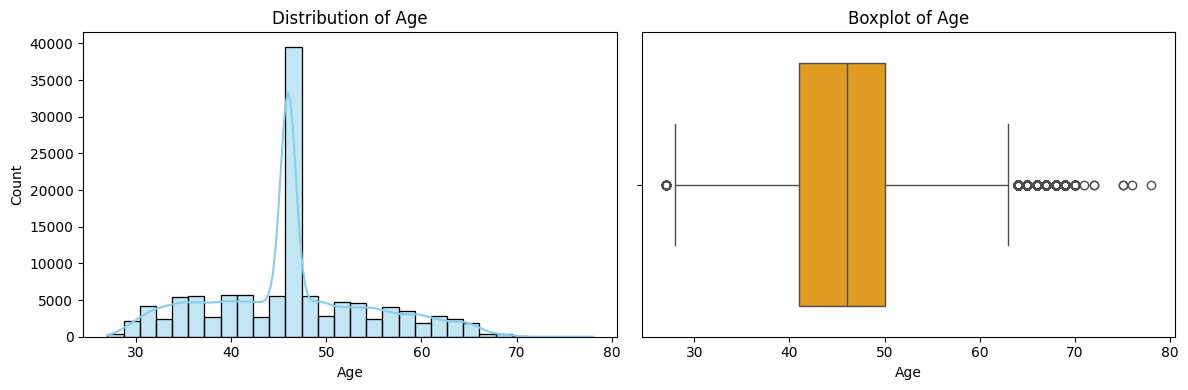

In [48]:
# Visual scan for numeric distributions + outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram and boxplot side-by-side for all numeric columns
for col in num_cols:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

## Outlier Treatment: IQR Capping (Winsorization)

To address the presence of extreme values identified in the previous visualizations, we apply **IQR-based capping (Winsorization)** to selected numeric columns. This process helps to reduce the influence of outliers without removing data points, making the dataset more robust for modeling.

---

### Steps Performed

1. **Data Copy:**  
   - Created a copy of the original dataframe (`df_winsor`) to preserve the raw data.

2. **Selected Columns for Capping:**  
   - Outlier capping was applied to the following columns:
     - `First_EMI_Bounced`
     - `Max_Sanctioned_Amount_Live`
     - `DPD_30_Last_6_Months`
     - `DPD_60_Last_6_Months`
     - `DPD_90_Last_3_Months`

3. **IQR Capping Method:**  
   - For each selected column:
     - Calculated the first quartile (Q1) and third quartile (Q3).
     - Computed the interquartile range (IQR = Q3 - Q1).
     - Determined lower and upper bounds as:
       - Lower Bound = Q1 - 1.5 × IQR
       - Upper Bound = Q3 + 1.5 × IQR
     - Values below the lower bound were set to the lower bound.
     - Values above the upper bound were set to the upper bound.

---

### Why This Matters

- **Reduces the impact of extreme values** that could skew model training and evaluation.
- **Preserves the overall structure** of the data by capping rather than removing outliers.
- **Improves model robustness** and generalization, especially for algorithms sensitive to outliers.

---

In [49]:
# Copy to avoid altering original
df_winsor = df.copy()

# Columns to cap
outlier_cols = ['First_EMI_Bounced', 'Max_Sanctioned_Amount_Live', 
                'DPD_30_Last_6_Months', 'DPD_60_Last_6_Months', 'DPD_90_Last_3_Months']

# Apply IQR capping
for col in outlier_cols:
    Q1 = df_winsor[col].quantile(0.25)
    Q3 = df_winsor[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    df_winsor[col] = np.where(df_winsor[col] < lower_bound, lower_bound, df_winsor[col])
    df_winsor[col] = np.where(df_winsor[col] > upper_bound, upper_bound, df_winsor[col])

print("✅ Outlier capping applied to:", outlier_cols)


✅ Outlier capping applied to: ['First_EMI_Bounced', 'Max_Sanctioned_Amount_Live', 'DPD_30_Last_6_Months', 'DPD_60_Last_6_Months', 'DPD_90_Last_3_Months']


### Output

- Outlier capping has been successfully applied to the specified columns.
- The dataset (`df_winsor`) is now ready for further analysis, feature engineering, or modeling with reduced influence from extreme values.

---

## Visualizing the Effect of Outlier Capping

To assess the impact of IQR-based capping (Winsorization) on the selected numeric features, we compare the boxplots of each column before and after capping. This visual comparison helps confirm that extreme values have been effectively limited, reducing their influence on subsequent analyses and modeling.

---

### What This Step Does

- **Side-by-Side Boxplots:**  
  For each outlier-capped column, two boxplots are displayed:
  - **Before Capping:** Shows the original distribution, highlighting the presence and extent of outliers.
  - **After Capping:** Shows the distribution after applying IQR capping, with extreme values limited to the calculated bounds.

---

### How to Interpret the Plots

- **Before Capping:**  
  - Outliers appear as points or extended whiskers far from the box.
  - The spread may be large, indicating high variability.

- **After Capping:**  
  - Whiskers are shortened, and extreme points are brought within the IQR bounds.
  - The central box (interquartile range) remains, but the influence of outliers is reduced.

---

### Why This Matters

- **Confirms Outlier Treatment:**  
  Visual evidence that capping has successfully limited extreme values.
- **Improves Data Quality:**  
  Reduces the risk of outliers distorting model training and statistical summaries.
- **Supports Robust Analysis:**  
  Ensures that subsequent analyses and models are less sensitive to rare, extreme data points.

---

*Reviewing these plots to ensure that the capping process has worked as intended. If any variable still shows problematic outliers, have to consider further investigation or alternative treatments before proceeding.*


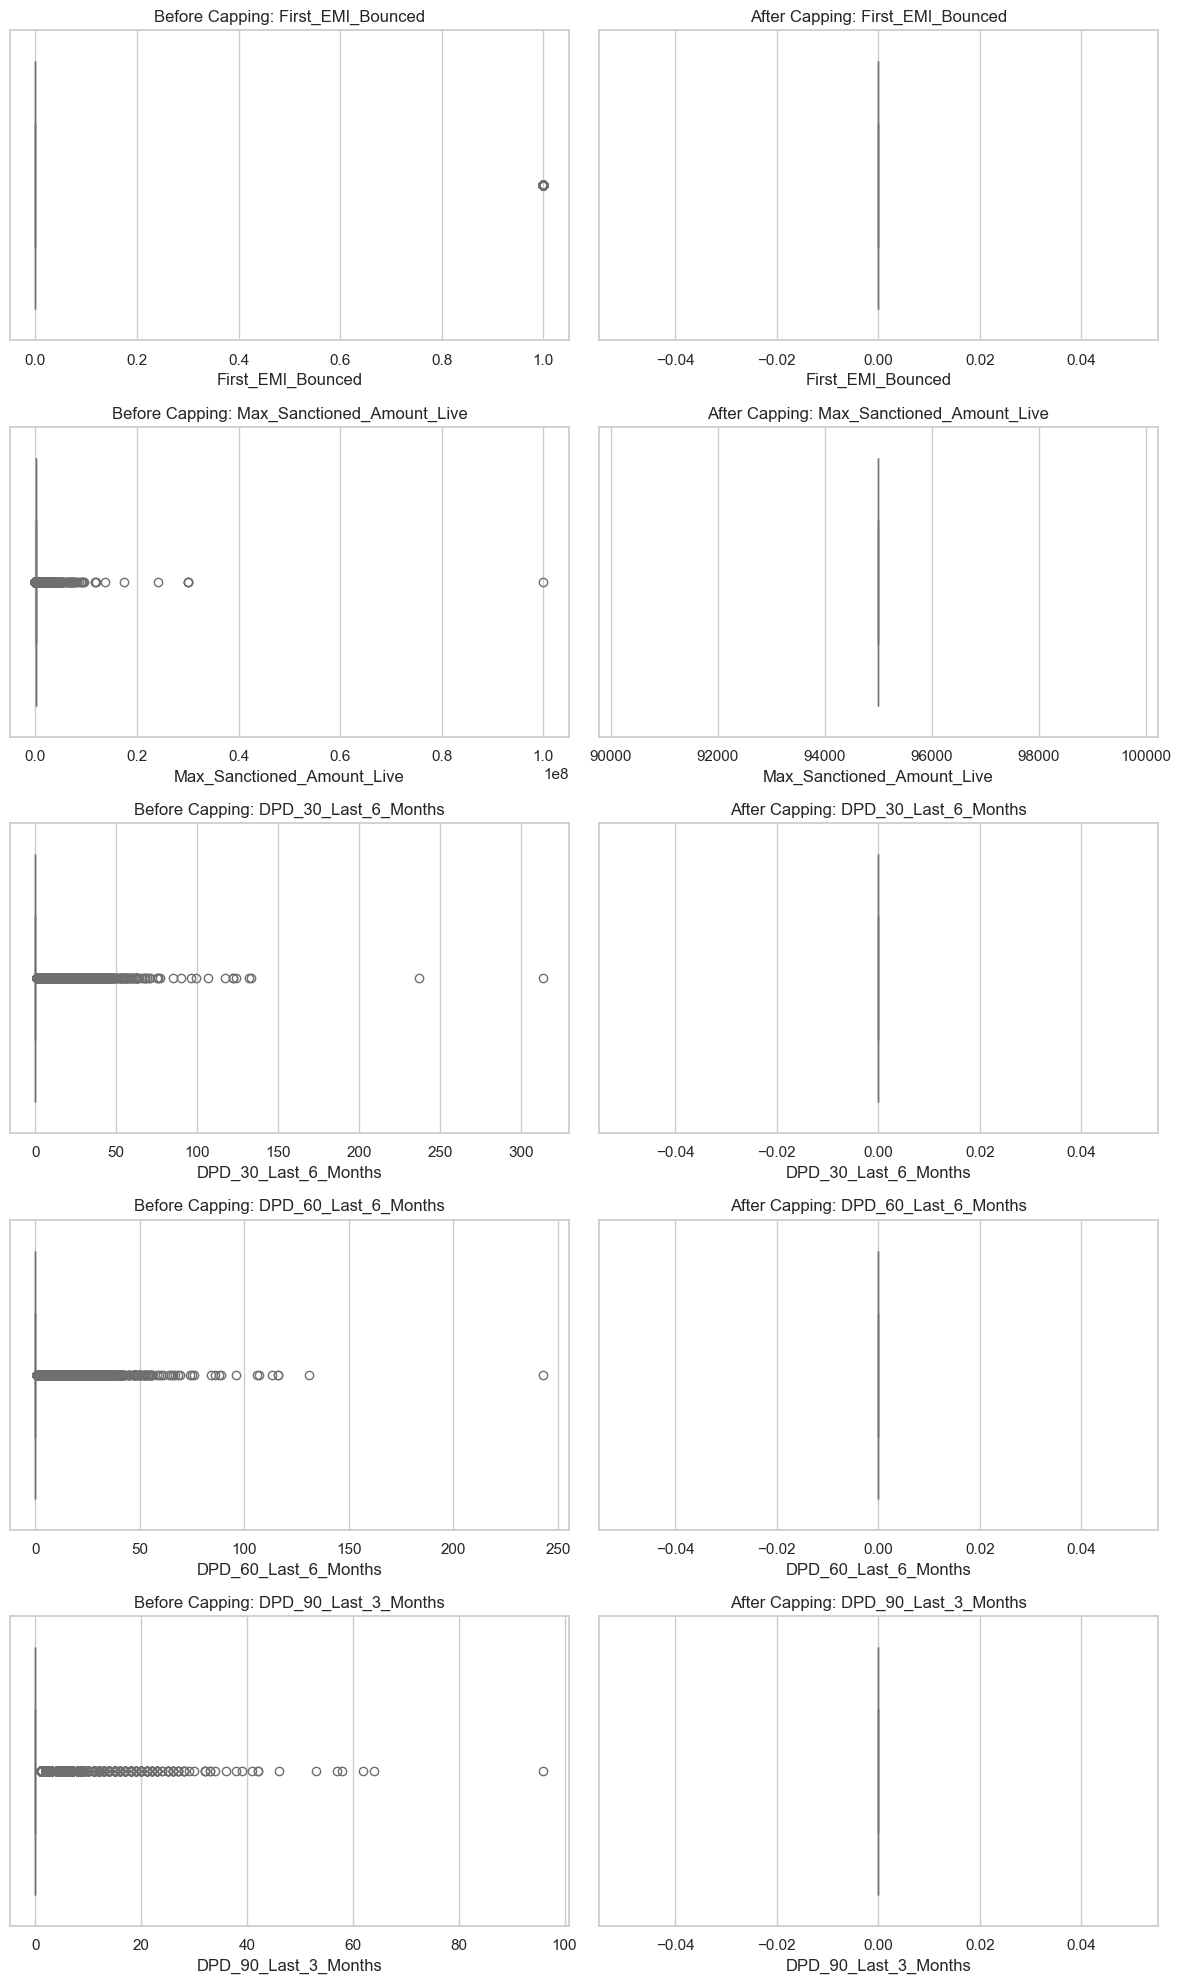

In [50]:
# Set plot style
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=len(outlier_cols), ncols=2, figsize=(12, 4 * len(outlier_cols)))

for i, col in enumerate(outlier_cols):
    # Original
    sns.boxplot(x=df[col], ax=axes[i][0], color='skyblue')
    axes[i][0].set_title(f'Before Capping: {col}')
    
    # Capped
    sns.boxplot(x=df_winsor[col], ax=axes[i][1], color='lightgreen')
    axes[i][1].set_title(f'After Capping: {col}')

plt.tight_layout()
plt.show()


## Encode Categorical Features for Exploratory Data Analysis (EDA)

To facilitate numerical analysis and visualization, we encode the categorical features using Label Encoding. This step converts each category into a unique integer, making it easier to work with these features in statistical and machine learning methods.

---

In [41]:
# Encode categorical features for EDA
df_encoded = df.copy()
le_dict = {}

for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    le_dict[col] = le

print("Encoded categorical columns:", df_encoded[cat_cols].head())

Encoded categorical columns:    Resident_Type  Dealer_Code  Product_Code  Tier  Employment_Type  Gender
0              2          280             4     0                0       0
1              3         1439             1     0                4       1
2              3          249             4     0                4       1
3              3          271             4     0                3       0
4              3         2506             0     0                3       1


### What was done:
- Created a copy of the original dataframe to preserve raw data.
- Applied `LabelEncoder` to each categorical column.
- Stored each encoder in a dictionary (`le_dict`) for potential inverse transformations later.

---
The encoded dataframe (`df_encoded`) is now ready for numerical analysis and visualization.

## Prepare Data for Modeling and Define Gini Score

In this step, we set up the data for model training and evaluation, and define a custom Gini score function—a common metric for assessing model performance in imbalanced classification problems.

---

### Steps Performed

1. **Import Required Libraries**
   - Imported essential modules for modeling, evaluation, and data splitting:
     - `LogisticRegression` for building a baseline model.
     - `roc_auc_score` for calculating the Area Under the ROC Curve (AUC).
     - `train_test_split` for splitting the data into training and testing sets.
     - `deepcopy` and `numpy` for data manipulation and copying.

2. **Prepare Features and Target**
   - `X`: All features except the target (`Loan_Default`).
   - `y`: The target variable (`Loan_Default`).

3. **Train-Test Split**
   - Split the data into training and testing sets using an 80/20 ratio.
   - Used stratified sampling to maintain the class distribution in both sets.
   - Set a random seed (`random_state=42`) for reproducibility.

4. **Define Gini Score Function**
   - Created a function `gini_score` that computes the Gini coefficient based on the ROC AUC score:
     - \( \text{Gini} = 2 \times \text{AUC} - 1 \)
   - The Gini coefficient is widely used in credit risk modeling to measure discriminatory power.

---

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from copy import deepcopy
import numpy as np

# Setup data
X = df_encoded.drop('Loan_Default', axis=1)
y = df_encoded['Loan_Default']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Gini Score Function
def gini_score(y_true, y_pred_proba):
    auc = roc_auc_score(y_true, y_pred_proba)
    return 2 * auc - 1


The data is now ready for model training and evaluation, with a custom Gini score function defined for performance measurement.

## Baseline Model: Logistic Regression with Feature Scaling

In this step, we build a baseline predictive model using logistic regression, incorporating feature scaling to ensure all features contribute equally to the model.

---

### Steps Performed

1. **Import Required Modules**
   - Imported `StandardScaler` for feature scaling.
   - Imported `make_pipeline` to streamline preprocessing and modeling.

2. **Pipeline Construction**
   - Created a pipeline that first scales all features using `StandardScaler`, then fits a logistic regression model (`max_iter=1000` for convergence).

3. **Model Training and Prediction**
   - Trained the pipeline on the training data.
   - Predicted the probability of default for the test set.

4. **Performance Evaluation**
   - Calculated the Gini score using the previously defined `gini_score` function.

---

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Scale + Train logistic regression
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe.fit(X_train, y_train)
y_pred_proba = pipe.predict_proba(X_test)[:, 1]
baseline_gini = gini_score(y_test, y_pred_proba)

print(f"🚀 Baseline Gini Score with all features (scaled): {baseline_gini:.4f}")


🚀 Baseline Gini Score with all features (scaled): 0.5366


### Output

- **Baseline Gini Score with all features (scaled):**  
  **0.5366**

---

This baseline Gini score provides a reference point for evaluating the impact of future feature selection, engineering, or model improvements.


## Feature Importance via Gini Drop Analysis

In this step, we assess the importance of each feature by measuring the change in Gini score when each feature is individually removed from the model. This helps identify which features contribute most to the model's predictive power.

---

### Methodology

- For each feature, we:
  - Remove the feature from the dataset.
  - Retrain the logistic regression model (with scaling) on the remaining features.
  - Calculate the Gini score on the test set.
  - Compute the difference (`Gini_Drop`) between the baseline Gini and the new Gini score.
- Features are then sorted by the smallest Gini drop, indicating the least impact on model performance when dropped.

---

In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

feature_gini_drop = []

# Go one-by-one and drop each feature
for feature in X.columns:
    X_temp = X.drop(columns=[feature])
    
    # Split again (same y used)
    X_train_temp, X_test_temp, _, _ = train_test_split(X_temp, y, stratify=y, test_size=0.2, random_state=42)
    
    # Use pipeline: StandardScaler + LogisticRegression
    pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
    pipe.fit(X_train_temp, y_train)
    y_pred_temp = pipe.predict_proba(X_test_temp)[:, 1]
    
    gini = gini_score(y_test, y_pred_temp)
    delta = baseline_gini - gini
    feature_gini_drop.append((feature, gini, delta))

# Create DataFrame of Gini drops
drop_df = pd.DataFrame(feature_gini_drop, columns=['Feature', 'Gini_Without', 'Gini_Drop'])
drop_df = drop_df.sort_values(by='Gini_Drop')

# Show result
print("📉 Features sorted by least Gini impact when dropped:\n")
print(drop_df.head(15))


📉 Features sorted by least Gini impact when dropped:

                       Feature  Gini_Without  Gini_Drop
12             Employment_Type      0.541615  -0.005057
4                          EMI      0.540420  -0.003861
13               Resident_Type      0.539493  -0.002934
7                  Dealer_Code      0.538816  -0.002257
24                        Tier      0.538226  -0.001667
20  Max_TwoWheeler_Loan_Amount      0.537722  -0.001164
5                  Loan_Amount      0.537694  -0.001135
1       Bounces_Last_12_Months      0.537504  -0.000945
0            First_EMI_Bounced      0.537209  -0.000650
16               Secured_Loans      0.536933  -0.000375
2                      Max_MOB      0.536851  -0.000292
19     New_Loans_Last_3_Months      0.536559   0.000000
8                 Product_Code      0.535953   0.000606
10               Interest_Rate      0.535855   0.000704
22        DPD_60_Last_6_Months      0.535305   0.001253


### Top 15 Features with Least Gini Impact When Dropped

| Feature                      | Gini Without | Gini Drop  |
|------------------------------|--------------|------------|
| Employment_Type              | 0.5416       | -0.0051    |
| EMI                          | 0.5404       | -0.0039    |
| Resident_Type                | 0.5395       | -0.0029    |
| Dealer_Code                  | 0.5388       | -0.0023    |
| Tier                         | 0.5382       | -0.0017    |
| Max_TwoWheeler_Loan_Amount   | 0.5377       | -0.0012    |
| Loan_Amount                  | 0.5377       | -0.0011    |
| Bounces_Last_12_Months       | 0.5375       | -0.0009    |
| First_EMI_Bounced            | 0.5372       | -0.0007    |
| Secured_Loans                | 0.5369       | -0.0004    |
| Max_MOB                      | 0.5369       | -0.0003    |
| New_Loans_Last_3_Months      | 0.5366       | 0.0000     |
| Product_Code                 | 0.5360       | 0.0006     |
| Interest_Rate                | 0.5359       | 0.0007     |
| DPD_60_Last_6_Months         | 0.5353       | 0.0013     |

---

### Interpretation

- **Negative Gini Drop:** Indicates that removing the feature actually increased the Gini score slightly, suggesting the feature may not be helpful or could introduce noise.
- **Near-Zero Gini Drop:** Features with a Gini drop close to zero have minimal impact on model performance and could be candidates for removal or further investigation.
- **Larger Gini Drop:** Features with a larger (positive) Gini drop are more important for the model's predictive power.

---

This analysis provides a data-driven basis for feature selection, helping to streamline the model and potentially improve generalization by removing less useful features.